### L_22 Magnitude of the Gradient  
##### My Output for this function, when run online, looks like this:   
<img src='l22-my-output-of-thresh-mag.png' />  
#### my solution:  

In [1]:
%matplotlib inline

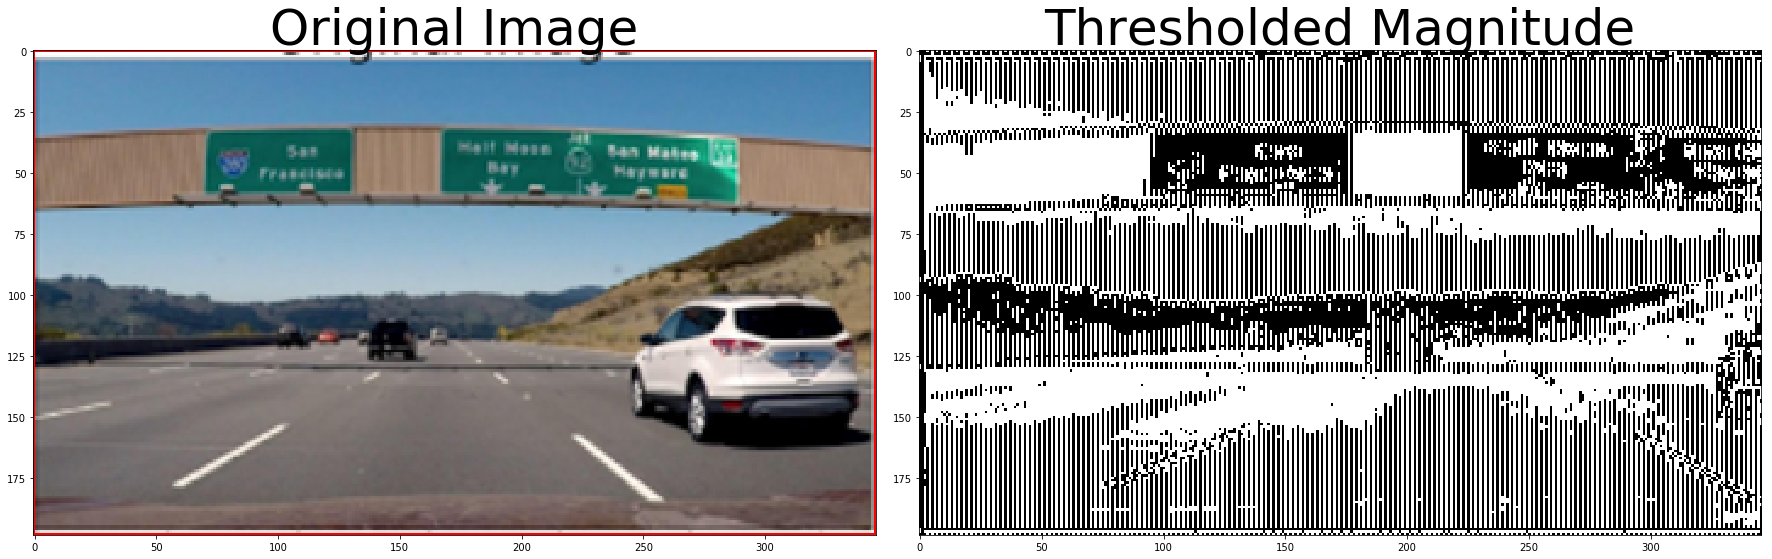

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Calculate the magnitude 
    abs_sobel = np.sqrt(np.square(sobelx) + np.square(sobely))

    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled = np.uint8(255 * abs_sobel/np.max(abs_sobel))
    
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(gray)
    binary_output[ ((scaled >= mag_thresh[0]) & (scaled <= mag_thresh[1])) ] = 1
    
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### My Output for this function, when run online, looks like this:  
<img src='l22-my-output-of-thresh-mag.png' />

### Read Me file
#### Instructions

#### Magnitude of the Gradient  

With the result of the last quiz, you can now take the gradient in x or y and set thresholds to identify pixels within a certain gradient range. If you play around with the thresholds a bit, you'll find the x-gradient does a cleaner job of picking up the lane lines, but you can see the lines in the y-gradient as well.  

In this next exercise, your goal is to apply a threshold to the overall magnitude of the gradient, in both x and y.  

The magnitude, or absolute value, of the gradient is just the square root of the squares of the individual x and y gradients. For a gradient in both the x and y directions, the magnitude is the square root of the sum of the squares.  


It's also worth considering the size of the region in the image over which you'll be taking the gradient. You can modify the kernel size for the Sobel operator to change the size of this region. Taking the gradient over larger regions can smooth over noisy intensity fluctuations on small scales. The default Sobel kernel size is 3, but here you'll define a new function that takes kernel size as a parameter (must be an odd number!)  

The function you'll define for the exercise below should take in an image and optional Sobel kernel size, as well as thresholds for gradient magnitude. Next, you'll compute the gradient magnitude, apply a threshold, and create a binary output image showing where thresholds were met.   

Steps to take in this exercise:  
Fill out the function in the editor below to return a thresholded gradient magnitude. Again, you can apply exclusive (<, >) or inclusive (<=, >=) thresholds.  
Test that your function returns output similar to the example below for sobel_kernel=9, mag_thresh=(30, 100).  
Here's an example of the output you're going for:  


#### Starter Code:

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Calculate the magnitude 
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    # 5) Create a binary mask where mag thresholds are met
    # 6) Return this mask as your binary_output image
    binary_output = np.copy(img) # Remove this line
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)